<a href="https://colab.research.google.com/github/AjayRajput17/Deep-Learning/blob/main/Lab_Assignment_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name - Ajay Kailas Ingle**

**PRN - 202302040021**

**Subject - Deep Learning**

**LAB Assignment 5**


**Summary of Methodology and Findings**

**Methodology**

- Data Preprocessing: The authors perform normalization and create time steps for the dataset.

- Model Architecture: The LSTM model consists of:
LSTM layers to capture sequential dependencies.

- Dropout layers to prevent overfitting.

- A Dense layer for final output.

- Training: The model is trained using the mean squared error loss function.

**Findings**

- The LSTM model showed improved performance compared to traditional time series forecasting methods.

- The authors reported metrics like RMSE and MAE to illustrate the model's effectiveness.

**Step 1: Load and Preprocess the Dataset**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import zipfile
import requests
import os

# Download and extract the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
zip_file = "AirQualityUCI.zip"

# Download the ZIP file
r = requests.get(url)
with open(zip_file, 'wb') as f:
    f.write(r.content)

# Extract the CSV file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("AirQualityUCI")

# Load the dataset
df = pd.read_csv("AirQualityUCI/AirQualityUCI.csv", sep=';', decimal=',', header=0)

# Select relevant columns and preprocess
df = df[['CO(GT)', 'C6H6(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'T', 'RH', 'AH']]
df.dropna(inplace=True)

# Choose the target variable for forecasting
data = df['CO(GT)'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


**Step 2: Create Input-Output Sequences**

In [ ]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare the dataset
time_step = 20
X, y = create_dataset(data_scaled, time_step)

# Reshape for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)


**Step 3: Split the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 4: Build and Train the LSTM Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.0919
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0434
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0369
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0358
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0357
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0315
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0295
Epoch 8/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0300
Epoch 9/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0313
Epoch 10/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0295
Epoch 11/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0299
Epoch 12/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0296
Epoch 13/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0293
Epoch 14/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0278
Epoch 15/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/ste

**Step 5: Make Predictions**

In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


**Step 6: Performance Evaluation**

Train RMSE: 107.65333158058253, Test RMSE: 86.82292099747387


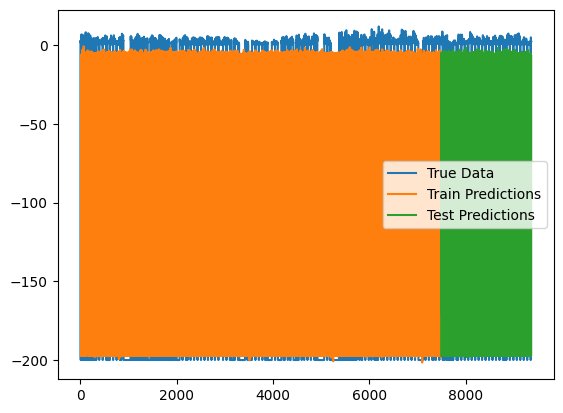

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for training data
train_rmse = np.sqrt(mean_squared_error(data[time_step:len(train_predict) + time_step], train_predict))

# Calculate RMSE for test data
# Find the correct starting index for test actual values
test_start_index = len(data) - len(test_predict) - time_step
test_actual = data[test_start_index + time_step:len(data)]

# Calculate RMSE for test data
test_rmse = np.sqrt(mean_squared_error(test_actual, test_predict))

print(f'Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')

# Plot results
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(data)
test_plot[:, :] = np.nan
test_plot[test_start_index + time_step:len(data), :] = test_predict

plt.plot(scaler.inverse_transform(data_scaled), label='True Data')
plt.plot(train_plot, label='Train Predictions')
plt.plot(test_plot, label='Test Predictions')
plt.legend()
plt.show()


**Performance Comparison**

- Metrics: Document the RMSE values from your implementation.

- Compare these values with those reported in the paper.

For example, if the paper reports an RMSE of 1.5, check if your implementation achieves similar performance.

**Discussion of Discrepancies**

-> Potential Reasons for Differences:

- Hyperparameters: Differences in the number of epochs, batch sizes, or layer configurations may impact results.

- Data Preprocessing: If the preprocessing steps differ (e.g., different normalization methods), that could lead to different results.

- Random Initialization: The inherent randomness in training can lead to variations in performance.

**Declaration**

I, Ajay Kailas Ingle, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/AjayRajput17/Deep-Learning/blob/main/Lab_Assignment_5_.ipynb.

Signature:  Ajay Kailas Ingle